In [ ]:
# Data Preparation packages
import numpy as np
import pandas as pd

# Graphics packages
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling packages
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Reading data
df_pagto = pd.read_csv("payment_en.csv")
df_pagto.head()

,Paid_Debt,Presumed_Income,Age
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


In [ ]:
# Number of missings per features
df_pagto.isnull().sum()

Paid_Debt          0
Presumed_Income    0
Age                0
dtype: int64

In [ ]:
# Duplcates
df_pagto.duplicated().sum()

np.int64(33)

In [ ]:
# data info
df_pagto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Paid_Debt        400 non-null    int64  
 1   Presumed_Income  400 non-null    float64
 2   Age              400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


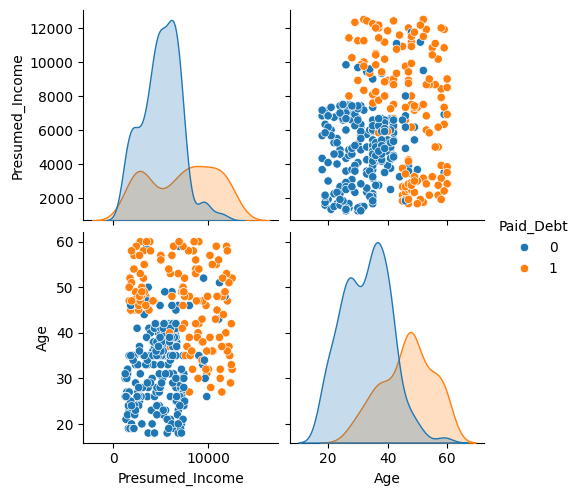

In [ ]:
# Pair plot
sns.pairplot(df_pagto, hue='Paid_Debt')

In [ ]:
# Features selection
df_modelo = df_pagto[['Presumed_Income',
                     'Age']].copy()

# Standard Scaler
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_modelo_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                                index=df_modelo.index,
                                columns=df_modelo.columns)

In [9]:
df_modelo.describe()

,Presumed_Income,Age
count,400.000000,400.000000
mean,5811.875275,37.655000
std,2841.413521,10.482877
min,1250.000000,18.000000
25%,3583.330000,29.750000
50%,5833.330000,37.000000
75%,7333.330000,46.000000
max,12500.000000,60.000000


In [10]:
df_modelo_scaled.describe()

,Presumed_Income,Age
count,4.000000e+02,4.000000e+02
mean,-4.618528e-16,-7.105427e-17
std,1.001252e+00,1.001252e+00
min,-1.607506e+00,-1.877311e+00
25%,-7.852909e-01,-7.550313e-01
50%,7.560179e-03,-6.256110e-02
75%,5.361276e-01,7.970571e-01
max,2.356750e+00,2.134241e+00


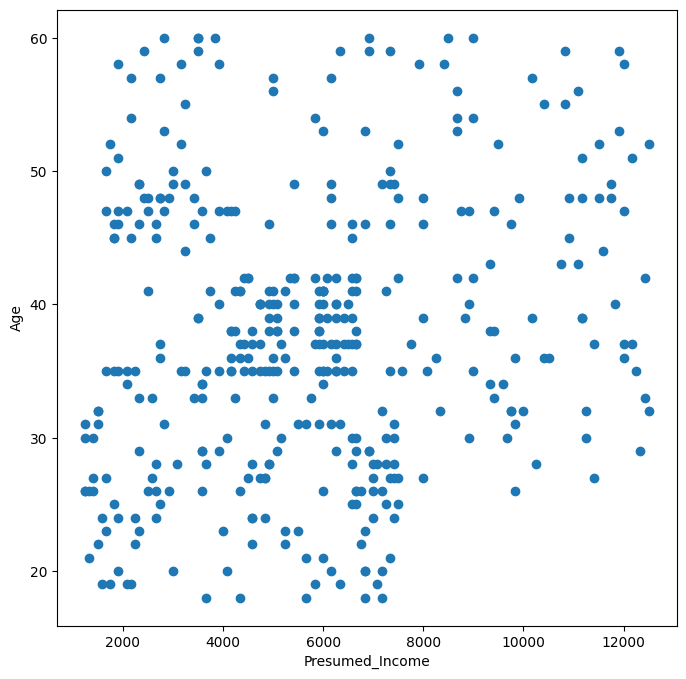

In [ ]:
# Plotting Presumed Income per Age
fig = plt.figure(figsize=(8,8))
plt.scatter(df_modelo['Presumed_Income'],
            df_modelo['Age']);
plt.xlabel('Presumed_Income');
plt.ylabel('Age');

In [ ]:
# Creation of K-Means model and fit
modelo_km = KMeans(n_clusters=2, 
                   random_state=42)
modelo_km.fit(df_modelo_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# K-means prediction
cluster_predito = modelo_km.predict(df_modelo_scaled)
cluster_predito

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
# K-Means cluster centers
modelo_km.cluster_centers_

array([[-0.37862616, -0.82201955],
       [ 0.32579461,  0.70731915]])

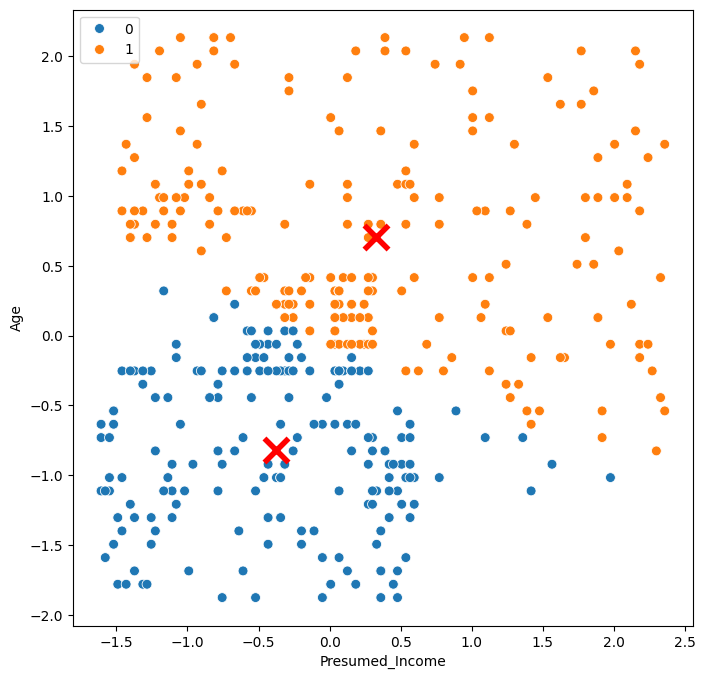

In [ ]:
# Scatter plot with cluster centers 
fig = plt.figure(figsize=(8,8))

# Plotando comprimento_petala por largura_petala
sns.scatterplot(x=df_modelo_scaled['Presumed_Income'],
                y=df_modelo_scaled['Age'],
                hue=cluster_predito, s=50)

# Marcando os centróides
sns.scatterplot(x=modelo_km.cluster_centers_[:,0],
                y=modelo_km.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='red', zorder=10);

In [ ]:
# Calculating Inertia
modelo_km.inertia_

518.0861880586287

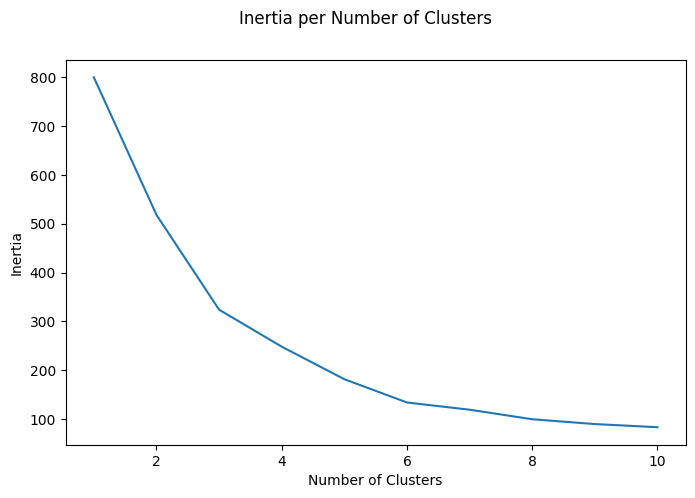

In [ ]:
# Using Elbow Method (Elbow-curve)
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_modelo_scaled)
    inertia.append(kmeans.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=range_n_clusters,
             y=inertia)
graf.figure.suptitle('Inertia per Number of Clusters');
graf.set_xlabel('Number of Clusters');
graf.set_ylabel('Inertia');

In [ ]:
# K-Means with 6 clusters
modelo_km6 = KMeans(n_clusters=6, 
                    random_state=42)

modelo_km6.fit(df_modelo_scaled)

KMeans(n_clusters=6, random_state=42)

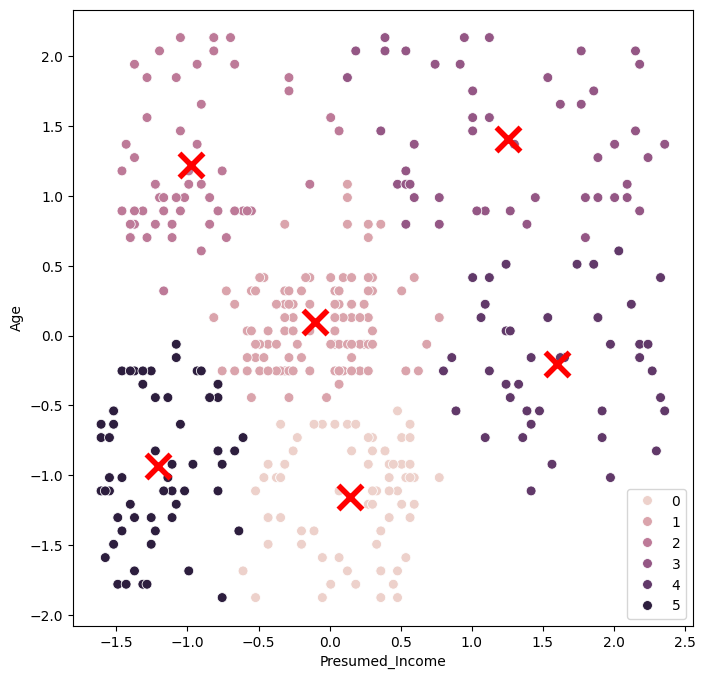

In [ ]:
# K-Means prediction
cluster_predito = modelo_km6.predict(df_modelo_scaled)

fig = plt.figure(figsize=(8,8))
# Plotting Presumed Income per Age
sns.scatterplot(x=df_modelo_scaled['Presumed_Income'],
                y=df_modelo_scaled['Age'],
                hue=cluster_predito,
                s=50)

# Setting the cluster centers 
sns.scatterplot(x=modelo_km6.cluster_centers_[:,0],
                y=modelo_km6.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='red', zorder=10);

In [ ]:
# 6 cluster prediction
df_modelo['cluster'] = modelo_km6.predict(df_modelo_scaled)

In [ ]:
# transposing the describe table
df_modelo.groupby('cluster').describe().T

cluster                          0            1            2             3  \
Presumed_Income count    72.000000   118.000000    57.000000     48.000000   
                mean   6226.851806  5529.661441  3035.088246   9368.056458   
                std    1037.466327   991.806486  1035.451216   1876.887356   
                min    4083.330000  3500.000000  1666.670000   6166.670000   
                25%    5250.000000  4750.000000  2333.330000   7500.000000   
                50%    6625.000000  5791.665000  2833.330000   9000.000000   
                75%    7083.330000  6250.000000  3500.000000  11104.165000   
                max    8000.000000  8000.000000  6000.000000  12500.000000   
Age             count    72.000000   118.000000    57.000000     48.000000   
                mean     25.555556    38.686441    50.456140     52.395833   
                std       3.971337     3.209758     5.088749      4.747853   
                min      18.000000    33.000000    41.000000     45.000000   
                25%      22.750000    36.000000    47.000000     48.000000   
                50%      26.000000    38.500000    49.000000     52.000000   
                75%      28.250000    41.000000    54.000000     57.000000   
                max      32.000000    49.000000    60.000000     60.000000   

cluster                           4            5  
Presumed_Income count     44.000000    61.000000  
                mean   10350.378864  2390.710164  
                std     1304.878480   841.011722  
                min     8083.330000  1250.000000  
                25%     9333.330000  1666.670000  
                50%    10083.335000  2250.000000  
                75%    11416.670000  3000.000000  
                max    12500.000000  4083.330000  
Age             count     44.000000    61.000000  
                mean      35.545455    27.901639  
                std        4.677778     5.220807  
                min       26.000000    18.000000  
                25%       32.000000    24.000000  
                50%       36.000000    28.000000  
                75%       39.000000    33.000000  
                max       44.000000    37.000000

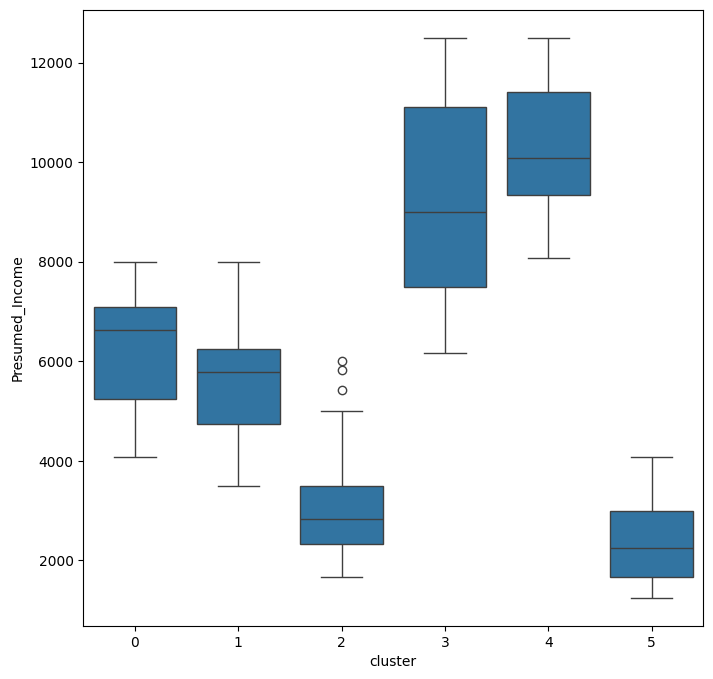

In [ ]:
# Cluster analysis per Presumed Income
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='Presumed_Income', 
            data=df_modelo);

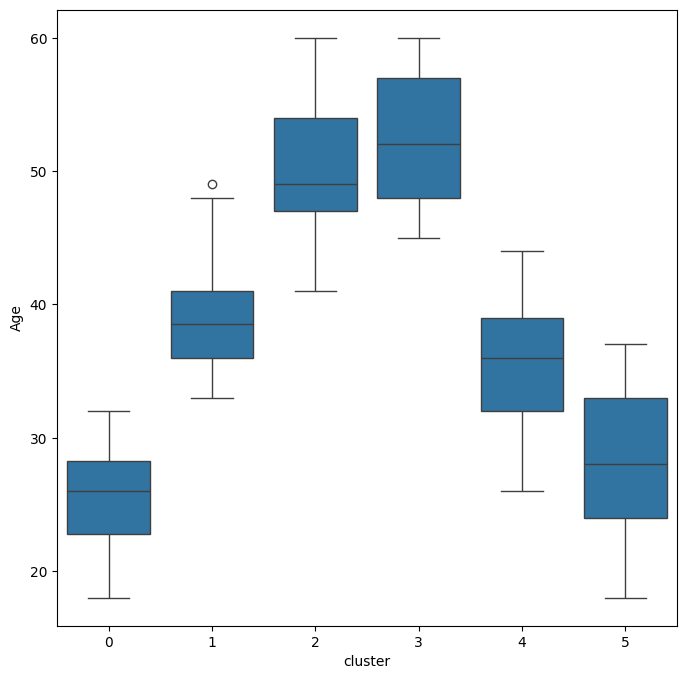

In [ ]:
# Cluster analysis per age
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='Age', 
            data=df_modelo);

In [24]:
df_pagto.head()

,Paid_Debt,Presumed_Income,Age
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


In [25]:
df_cluster_pagto = pd.concat([df_modelo[['cluster']],
                             df_pagto[['Paid_Debt']]], 
                            axis=1)
df_cluster_pagto.head()

,cluster,Paid_Debt
0,5,0
1,5,0
2,5,0
3,0,0
4,0,0


In [26]:
df_cluster_pagto.pivot_table(values='Paid_Debt', 
                            index='cluster')

,Paid_Debt
cluster,
0,0.013889
1,0.118644
2,0.859649
3,0.895833
4,0.818182
5,0.000000
